## Hand-Written Digit Reader
## Richard Cooke
## G00331787

### Approach of this notebook was based on this work: https://www.ics.uci.edu/~mohamadt/keras_mnist.html#Load-data-set.

This model was created as part of the Emerging Technologies project where we attempt to apply this model to a web application where a user 
will input a hand-written digit and a predicition on what digit the user entered should be returned to them. This model will mainly use the features of keras and numpy to complete this operation.

## Making The Necessary Imports

In [1]:
# Used to plot data
import numpy as np
import matplotlib.pyplot as plt

# Used to create the Neural network
import keras as kr

Using TensorFlow backend.


## Loading and Decompressing the dataset

In [2]:
# Importing the the mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
# Original data is [0-255]. Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

# Converting the images to float32 to allow for better division
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

# Dividing the images by 255 to scale the range to [0,1]
train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

# The third index in the array should have the 1
print("One hot vector at index 5 of training labels ", train_lbl[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images from the datasets

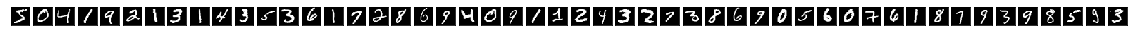

In [3]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(20,10))

# For loop that will iterate 50 times to display the first 50 images in the dataset
for i in range(50):
    plt.subplot(1,50,i+1)
    
    #shows the relevant image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Removing label markings from both the x and y axis'
    plt.xticks([])
    plt.yticks([])

## Creating the Neural Network

In [6]:
# Creating the neural netwrok by using the models import from keras
print("Creating model")
model = kr.models.Sequential()

print("Sequential model created")
print("Adding layers to model...")

# Creating the layers of the netwrok using the Dense call from the layers import
# Creating 4 dense layers
# 3 dense layers and 1 dropout layer

# 392 neurons in each of the first two layers to add up to 782 which the total amount of pixels in the passed image
# relu(Retified Linear Units) gives an output the same as the input if the input is greater than 0 and outputs 0 if the input is 0 or less
# relu is chosen here instead of sigmoid because it builds the model faster
model.add(kr.layers.Dense(392, activation='relu', input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(kr.layers.Dense(392, activation='relu'))

# Dropout layer exists to avoid overfitting of model
model.add(kr.layers.Dropout(0.2))

# 10 nuerons in the final layer to coincide with the 10 digits in the MNIST dataset
# softmax maps output to a [0,1] range, it is for probability distribution
model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added to model")

Creating model
Sequential model created
Adding layers to model...
Layers added to model


In [7]:
# Prints out a string summary of the model
print("Summarizing model...")
print("Model Summary")
model.summary()

Summarizing model...
Model Summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_6 (Dense)              (None, 392)               154056    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiles and completes the model
print("Compiling model...")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled")

Compiling model...
Model compiled


## Training the Model

In [9]:
# Batch size is number of samples that will be testsed
# Epochs is the amount of times the test is repeated
history = model.fit(train_img, train_lbl, batch_size=50, epochs=5, verbose=1, validation_data=(test_img, test_lbl))

#Testing with more than 10 epochs pushes model too far to 100% accuracy

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.2037 - accuracy: 0.9385 - val_loss: 0.1003 - val_accuracy: 0.9683
Epoch 2/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.0888 - val_accuracy: 0.9727
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0574 - accuracy: 0.9823 - val_loss: 0.0801 - val_accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0838 - val_accuracy: 0.9749
Epoch 5/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0721 - val_accuracy: 0.9780


## Evaluating Efficiency

This evaluation section of the notebook does not need to run for the notebook to work, it simply exists as an option to view the efficiency of the model in both string and graph format

In [10]:
# Calculates and displays the loss and accuracy of the model
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.019574180
Test accuracy: 0.993516684


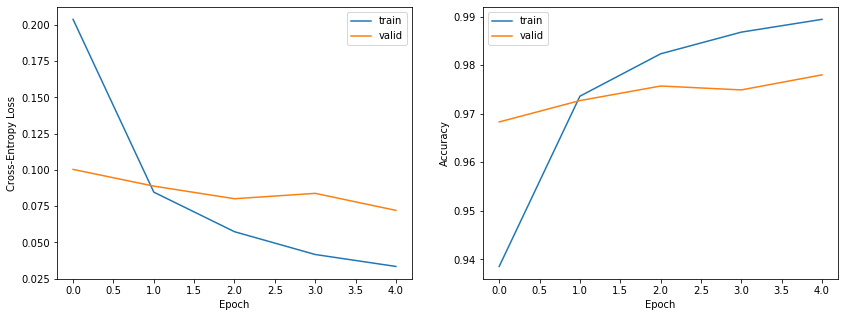

In [11]:
#Plotting the loss trajectory during training
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plotting the accuracy during training
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Saving The Model

In [12]:
print("Saving Model......")
model.save('digit_reader.h5')
print("Model Saved.")

Saving Model......
Model Saved.


## Loading an instance of the newly saved Model

This section of the model is for testing purposes wherein an instance of the recently saved model is generated and then is passed a test image to match against the training images and returns a prediction on what digit it has been passed and returns a prediction and normalized percentages for each digit.

In [13]:
#Loading the saved Model
print("Loading Model......")
loadedModel = kr.models.load_model('digit_reader.h5')
print("Model loaded.")

Loading Model......
Model loaded.


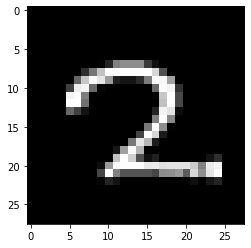

[[1.4790417e-05 6.3932050e-05 9.9992025e-01 5.3209096e-08 1.5725961e-09
  4.0536112e-09 3.1959092e-07 4.8746392e-07 1.5571918e-07 9.4790318e-09]] 
Predicted digit:  2


In [17]:
# Plots the image that will be passed for prediction
plt.imshow(test_img[77].reshape(28, 28), cmap="gray")
plt.show()

# Returns normalized output for each digit and also uses argmax to return the actual prediction
print(loadedModel.predict(test_img[77:78]), "\nPredicted digit: ", np.argmax(loadedModel.predict(test_img[77:78])))

## Other References

* https://keras.io/
* https://www.tensorflow.org/guide/keras/overview
* https://www.python.org/
* https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D135
* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
* https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e